In [1]:
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

## Consumption growth no short

In [2]:
data=pd.read_csv('C:/Users/herry/Desktop/optimization final graph/consumption_growth_noshort.csv',delimiter=';')
data

,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.012563,0.00,0.0000,0.4712,0.2995,0.0000,0.0010,0.0000,0.0000,0.0976,0.1229,0.0079
2,0.012407,0.01,0.0000,0.4661,0.2923,0.0000,0.0040,0.0000,0.0000,0.1005,0.1236,0.0135
3,0.012254,0.02,0.0000,0.4607,0.2854,0.0000,0.0095,0.0000,0.0004,0.1026,0.1237,0.0176
4,0.012104,0.03,0.0000,0.4552,0.2785,0.0000,0.0152,0.0000,0.0001,0.1049,0.1239,0.0221
...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.014801,0.76,0.0079,0.0000,0.0000,0.2800,0.1994,0.0093,0.1324,0.0996,0.0059,0.2654
78,0.015115,0.77,0.0063,0.0000,0.0000,0.2938,0.1951,0.0088,0.1331,0.0917,0.0003,0.2709
79,0.015443,0.78,0.0049,0.0000,0.0000,0.3103,0.1877,0.0076,0.1325,0.0808,0.0002,0.2760
80,0.015786,0.79,0.0026,0.0000,0.0000,0.3268,0.1807,0.0060,0.1322,0.0702,0.0000,0.2814


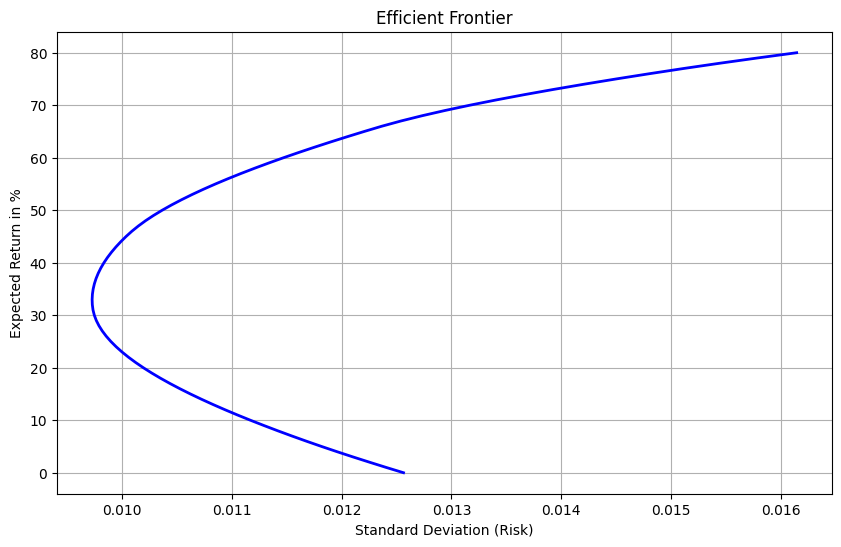

In [3]:
# Plotting the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data['SDp'], data['ERp']*100, 'b-', linewidth=2)
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return in %')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


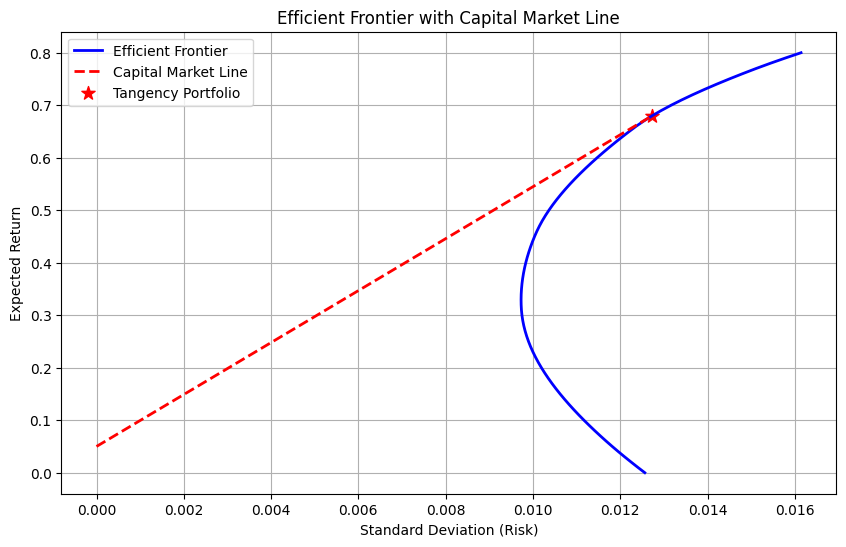

In [4]:
# Assuming 'risk_free_rate' is defined as the risk-free rate
risk_free_rate = 0.05

# Calculate the Sharpe ratio for each portfolio on the efficient frontier
data['SharpeRatio'] = (data['ERp'] - risk_free_rate) / (data['SDp'])

# Find the portfolio with the highest Sharpe ratio (tangency portfolio)
tangency_portfolio = data.loc[data['SharpeRatio'].idxmax()]

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data['SDp'], data['ERp'], 'b-', linewidth=2, label='Efficient Frontier')

# Plot the Capital Market Line (CML)
cml_x = [0, tangency_portfolio['SDp']]
cml_y = [risk_free_rate, tangency_portfolio['ERp']]
plt.plot(cml_x, cml_y, 'r--', linewidth=2, label='Capital Market Line')

# Mark the tangency portfolio
plt.scatter(tangency_portfolio['SDp'], tangency_portfolio['ERp'], color='red', marker='*', s=100, label='Tangency Portfolio')

plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Capital Market Line')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
tangency_portfolio 

SDp             0.012733
ERp             0.680000
x1              0.012400
x2              0.000000
x3              0.000000
x4              0.184000
x5              0.222100
x6              0.006900
x7              0.122400
x8              0.151200
x9              0.077600
x10             0.223300
SharpeRatio    49.477857
Name: 69, dtype: float64

## Consumption growth short


In [6]:
data_short=pd.read_csv('C:/Users/herry/Desktop/optimization final graph/consumption_growth_short.csv',delimiter=';')
data_short

,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.011660,0.00,-0.0285,0.4666,0.2539,-0.1018,0.0840,-0.0479,0.0396,0.1393,0.1269,0.0679
2,0.011550,0.01,-0.0279,0.4620,0.2483,-0.0984,0.0862,-0.0470,0.0412,0.1398,0.1267,0.0691
3,0.011442,0.02,-0.0273,0.4575,0.2427,-0.0950,0.0884,-0.0461,0.0428,0.1402,0.1266,0.0702
4,0.011337,0.03,-0.0267,0.4529,0.2371,-0.0916,0.0906,-0.0451,0.0443,0.1407,0.1264,0.0713
...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.013082,0.76,0.0152,0.1206,-0.1703,0.1555,0.2525,0.0226,0.1605,0.1739,0.1157,0.1538
78,0.013217,0.77,0.0158,0.1161,-0.1759,0.1588,0.2547,0.0236,0.1621,0.1744,0.1155,0.1549
79,0.013354,0.78,0.0163,0.1115,-0.1815,0.1622,0.2569,0.0245,0.1637,0.1748,0.1154,0.1560
80,0.013493,0.79,0.0169,0.1070,-0.1870,0.1656,0.2591,0.0254,0.1653,0.1753,0.1152,0.1572


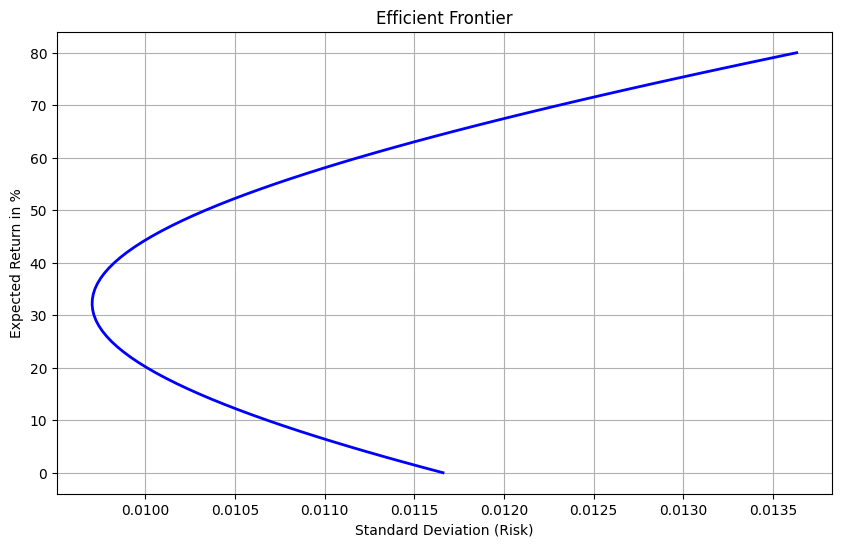

In [7]:
# Plotting the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data_short['SDp'], data_short['ERp']*100, 'b-', linewidth=2)
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return in %')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


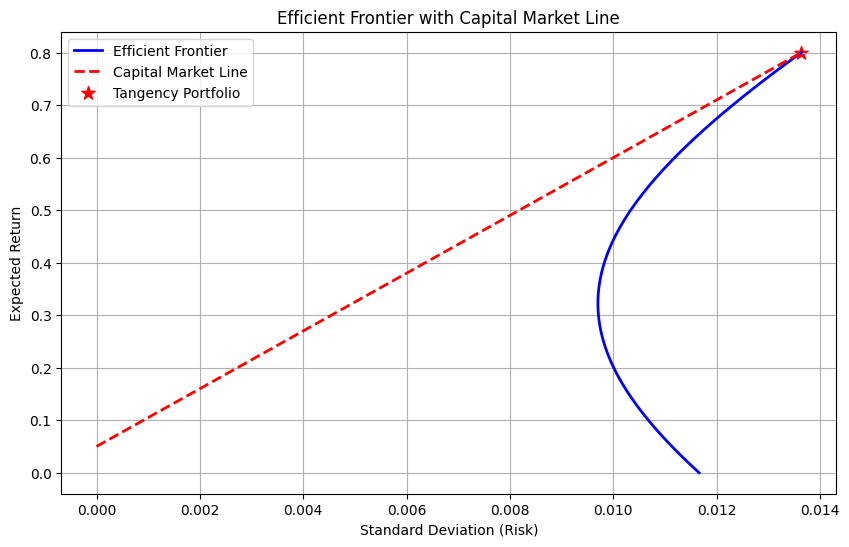

In [8]:
# Assuming 'risk_free_rate' is defined as the risk-free rate
risk_free_rate = 0.05

# Calculate the Sharpe ratio for each portfolio on the efficient frontier
data_short['SharpeRatio'] = (data_short['ERp'] - risk_free_rate) / (data_short['SDp'])

# Find the portfolio with the highest Sharpe ratio (tangency portfolio)
tangency_portfolio = data_short.loc[data_short['SharpeRatio'].idxmax()]

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data_short['SDp'], data_short['ERp'], 'b-', linewidth=2, label='Efficient Frontier')

# Plot the Capital Market Line (CML)
cml_x = [0, tangency_portfolio['SDp']]
cml_y = [risk_free_rate, tangency_portfolio['ERp']]
plt.plot(cml_x, cml_y, 'r--', linewidth=2, label='Capital Market Line')

# Mark the tangency portfolio
plt.scatter(tangency_portfolio['SDp'], tangency_portfolio['ERp'], color='red', marker='*', s=100, label='Tangency Portfolio')

plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Capital Market Line')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
tangency_portfolio

SDp             0.013633
ERp             0.800000
x1              0.017500
x2              0.102400
x3             -0.192600
x4              0.169000
x5              0.261400
x6              0.026300
x7              0.166900
x8              0.175800
x9              0.115100
x10             0.158300
SharpeRatio    55.013290
Name: 81, dtype: float64

In [10]:
data_short

,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,SharpeRatio
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.011660,0.00,-0.0285,0.4666,0.2539,-0.1018,0.0840,-0.0479,0.0396,0.1393,0.1269,0.0679,-4.288176
2,0.011550,0.01,-0.0279,0.4620,0.2483,-0.0984,0.0862,-0.0470,0.0412,0.1398,0.1267,0.0691,-3.463220
3,0.011442,0.02,-0.0273,0.4575,0.2427,-0.0950,0.0884,-0.0461,0.0428,0.1402,0.1266,0.0702,-2.621832
4,0.011337,0.03,-0.0267,0.4529,0.2371,-0.0916,0.0906,-0.0451,0.0443,0.1407,0.1264,0.0713,-1.764082
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.013082,0.76,0.0152,0.1206,-0.1703,0.1555,0.2525,0.0226,0.1605,0.1739,0.1157,0.1538,54.273122
78,0.013217,0.77,0.0158,0.1161,-0.1759,0.1588,0.2547,0.0236,0.1621,0.1744,0.1155,0.1549,54.473881
79,0.013354,0.78,0.0163,0.1115,-0.1815,0.1622,0.2569,0.0245,0.1637,0.1748,0.1154,0.1560,54.663856
80,0.013493,0.79,0.0169,0.1070,-0.1870,0.1656,0.2591,0.0254,0.1653,0.1753,0.1152,0.1572,54.843510
